<a href="https://colab.research.google.com/github/Guilherm0/Regressao/blob/main/Exercicio2RegressaoLinearSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/C+¦pia de aprovacao_alunos (1).xlsx')
df = df.select_dtypes(include='number')
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


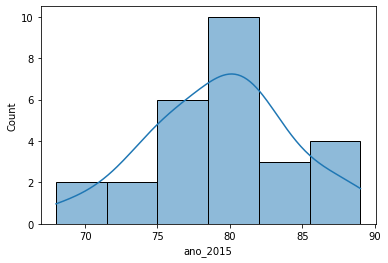

In [ ]:
sns.histplot(df, x = 'ano_2015', kde=True)

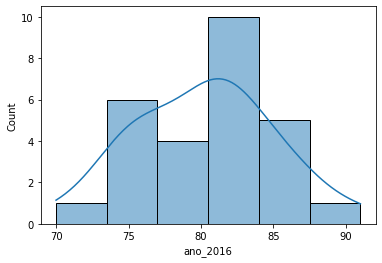

In [ ]:
sns.histplot(df, x = 'ano_2016', kde=True)

In [ ]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


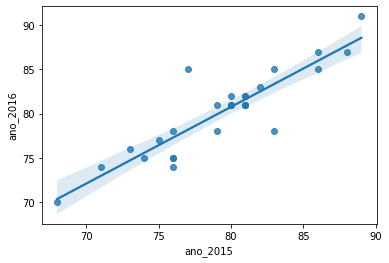

In [ ]:
sns.regplot(x = 'ano_2015', y = 'ano_2016', data=df)

In [ ]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfNorm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns= df.columns)

In [ ]:
dfNorm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


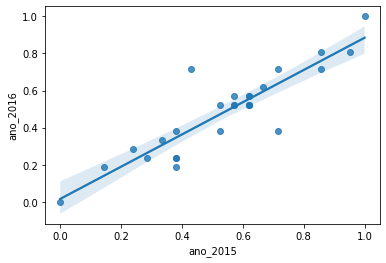

In [ ]:
sns.regplot(x = 'ano_2015', y = 'ano_2016', data=dfNorm)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = 'ano_2016~ano_2015-1'
model = smf.ols(formula=function, data=dfNorm).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                    2.21e-20
Time:                        15:45:40   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y = dfNorm['ano_2016']

x = dfNorm['ano_2015']

y = pd.DataFrame(y)

x = pd.DataFrame(x)

In [ ]:
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
# r-quadrado
r_sqr = lr.score(x_train,y_train)
print(r_sqr)

0.8800910056640281


In [ ]:
y_pred_train = lr.predict(x_train)
print('MAE', metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE', metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE 0.06313092719197842
MSE 0.006947385853516443
RMSE 0.08335097991935334


In [ ]:
#lr.fit(x_test,y_test)

In [ ]:
y_pred_test = lr.predict(x_test)
print('MAE', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE', metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE 0.10156392395533688
MSE 0.02234792217796548
RMSE 0.14949221443929941
